In [36]:
import matplotlib.pyplot as plt
import matplotlib.image as mpig
from keras_preprocessing.image import ImageDataGenerator
import tensorflow as tf
import seaborn as sns

In [37]:
IMG_PATH = 'cheetah vs hyena'
train_path = 'cheetah vs hyena/train'
val_path = 'cheetah vs hyena/validation'
class_name = ['hyena', 'cheetah']

In [38]:
img_data = ImageDataGenerator(
    rescale =  1./255,
    rotation_range = 0.45,
    zoom_range = 0.2,
    horizontal_flip = True,
    validation_split = 0.2,
    fill_mode = 'nearest'
)

In [39]:
# Training
train = img_data.flow_from_directory(
    train_path, #Path folder
    target_size = (128,128),
    batch_size = 16,
    shuffle =True,
    class_mode = 'categorical',
    subset = 'training'
)


# Validation
validation = img_data.flow_from_directory(
    val_path, #Path folder
    target_size = (128,128),
    batch_size = 16,
    shuffle =True,
    class_mode = 'categorical',
    subset = 'validation'
)

Found 1440 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [40]:
# Simpan Gambar
img_generator = img_data.flow_from_directory(
    IMG_PATH, #Path folder
    target_size = (128,128), # Ukuran Gambar
    batch_size = 16, # Ukuran Batch
    shuffle = True,
    class_mode = 'categorical',
    save_to_dir = 'cheetah vs hyena/Augmentasi',
    save_format = 'jpg'
)

Found 2432 images belonging to 3 classes.


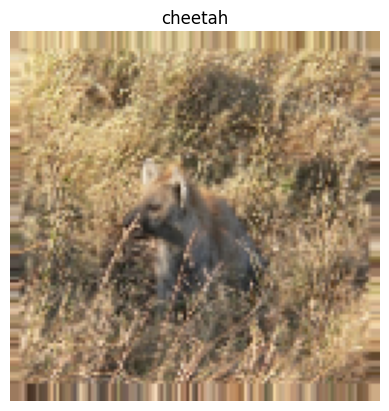

In [41]:
# for i in range(5):
#     img, label = img_generator.next()
#     plt.imshow(img[0])
#     plt.title(class_name[tf.argmax(label[0])])
#     plt.axis('off')
#     plt.show

In [42]:
from keras import Sequential
from keras.layers import Conv2D, Dense, Flatten, MaxPooling2D

In [47]:
model = Sequential()

# Input Layer
model.add(Conv2D(256, (3,3), activation = 'relu', input_shape = [128,128,3]))

# Hidden Layer
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128, 3, activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, 3, activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))

# Output Layer
model.add(Dense(2, activation = 'softmax'))


In [48]:
model.compile('adam','categorical_crossentropy',['accuracy'])

In [52]:
hasil = model.fit(train, epochs=20, validation_data = validation)

Epoch 1/20
90/90 [==============================] - 273s 3s/step - loss: 0.5677 - accuracy: 0.7118 - val_loss: 0.6555 - val_accuracy: 0.6250
Epoch 2/20
90/90 [==============================] - 257s 3s/step - loss: 0.5268 - accuracy: 0.7319 - val_loss: 0.8338 - val_accuracy: 0.6500
Epoch 3/20
90/90 [==============================] - 280s 3s/step - loss: 0.4853 - accuracy: 0.7674 - val_loss: 0.5884 - val_accuracy: 0.7250
Epoch 4/20
90/90 [==============================] - 282s 3s/step - loss: 0.5415 - accuracy: 0.7285 - val_loss: 0.6449 - val_accuracy: 0.5750
Epoch 5/20
90/90 [==============================] - 279s 3s/step - loss: 0.4549 - accuracy: 0.7694 - val_loss: 0.4225 - val_accuracy: 0.8500
Epoch 6/20
90/90 [==============================] - 286s 3s/step - loss: 0.3974 - accuracy: 0.8250 - val_loss: 0.4505 - val_accuracy: 0.7500
Epoch 7/20
90/90 [==============================] - 288s 3s/step - loss: 0.3798 - accuracy: 0.8299 - val_loss: 0.3765 - val_accuracy: 0.7750
Epoch 8/20
90

In [53]:
evaluasi = model.evaluate(validation)
print(f'Akurasi Validation-Set : {evaluasi[1]}')
print(f'Loss Validation-Set : {evaluasi[0]}')

3/3 [==============================] - 4s 681ms/step - loss: 0.3314 - accuracy: 0.9000
Akurasi Validation-Set : 0.8999999761581421
Loss Validation-Set : 0.3313599228858948


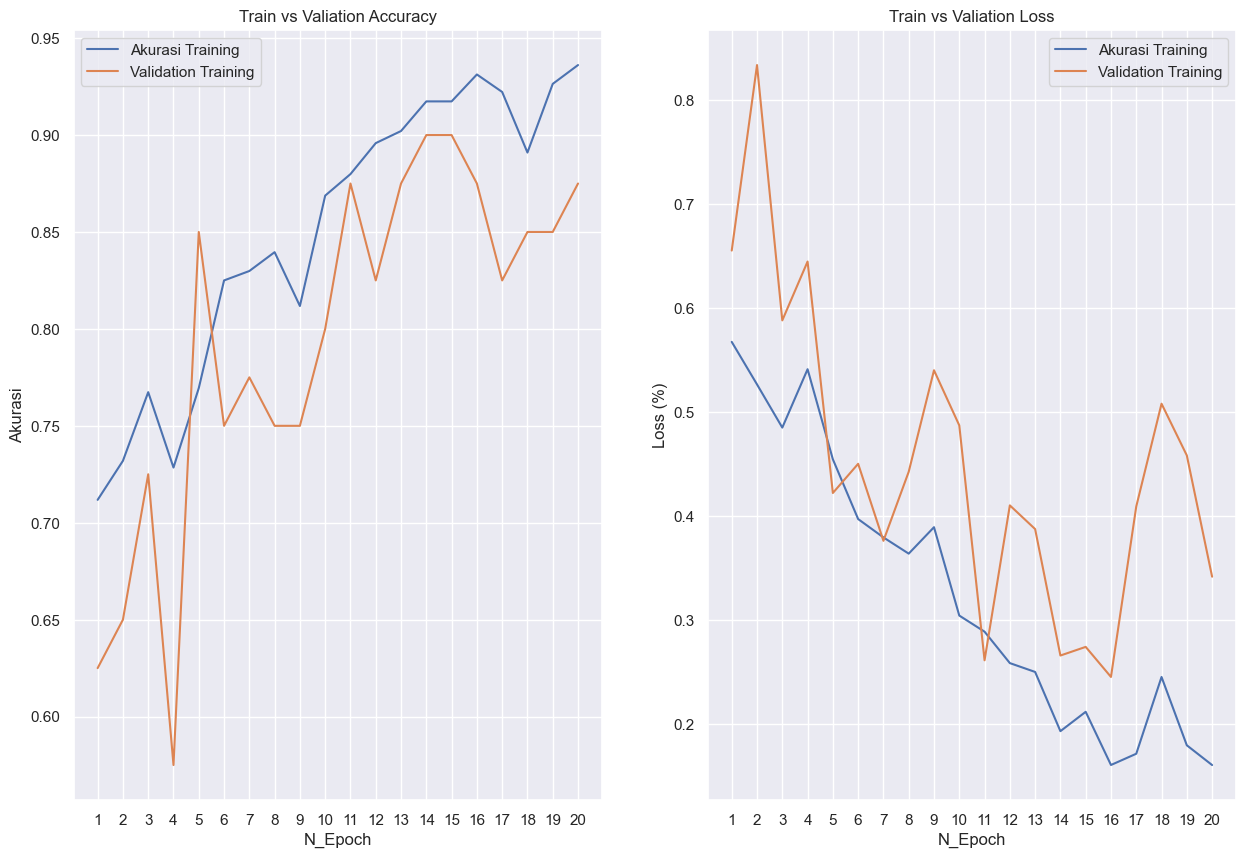

In [55]:
epochs = [i+1 for i in range(20)]

sns.set_theme()

plt.figure(figsize=(15,10))

# Subplot Akurasi
plt.subplot(1,2,1)
sns.lineplot(x=epochs, y=hasil.history['accuracy'], label = 'Akurasi Training')
sns.lineplot(x=epochs, y=hasil.history['val_accuracy'], label = 'Validation Training')


plt.xticks(epochs)
plt.ylabel('Akurasi')
plt.xlabel('N_Epoch')
plt.title('Train vs Valiation Accuracy')


# Subplot Loss
plt.subplot(1,2,2)
sns.lineplot(x=epochs, y=hasil.history['loss'], label = 'Akurasi Training')
sns.lineplot(x=epochs, y=hasil.history['val_loss'], label = 'Validation Training')

plt.xticks(epochs)
plt.ylabel('Loss (%)')
plt.xlabel('N_Epoch')
plt.title('Train vs Valiation Loss')

plt.show()

In [ ]:
print("Akurasi:", hasil.history["accuracy"][-1] * 100)